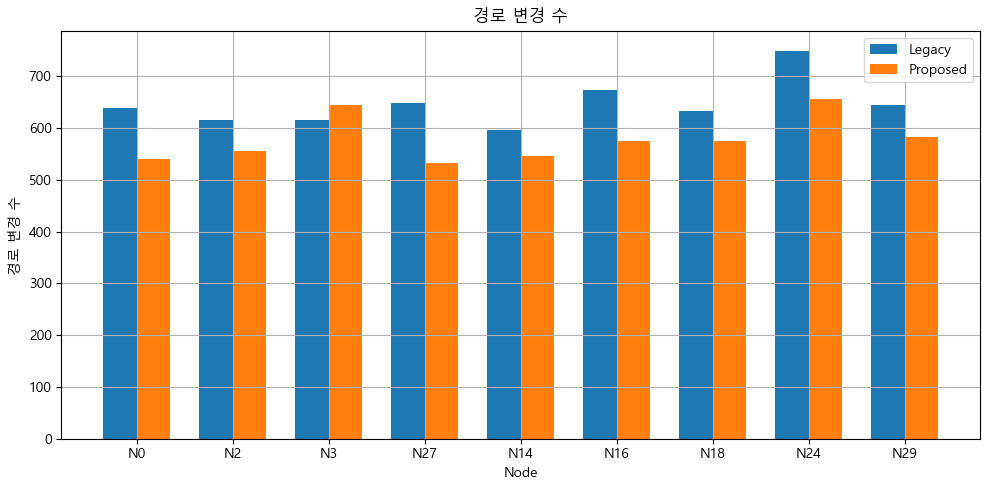

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N27", "N14", "N16", "N18", "N24", "N29"]

def compute_true_route_changes_per_dest(mode):
    avg_changes = {}

    for node in nodes:
        path = os.path.join(base_path, mode, density, speed, node, "aodv_routing_log.csv")
        if not os.path.isfile(path):
            avg_changes[node] = 0
            continue

        try:
            df = pd.read_csv(path)
            required_cols = [
                "Destination", "New_HopCount", "New_NextHop", "New_LifeTime"
            ]
            if not set(required_cols).issubset(df.columns):
                avg_changes[node] = 0
                continue

            df = df.sort_values(by=["Destination", "Time"])
            change_counts = {}
            prev_values = {}

            for _, row in df.iterrows():
                dest = row["Destination"]
                current = (
                    row["New_HopCount"],
                    row["New_NextHop"],
                    row["New_LifeTime"]
                )

                if dest not in prev_values:
                    prev_values[dest] = current
                    change_counts[dest] = 0
                    continue

                if current != prev_values[dest]:
                    change_counts[dest] += 1
                    prev_values[dest] = current

            avg = sum(change_counts.values()) / len(change_counts) if change_counts else 0
            avg_changes[node] = avg

        except:
            avg_changes[node] = 0

    return avg_changes

legacy_avg = compute_true_route_changes_per_dest("L")
proposed_avg = compute_true_route_changes_per_dest("P")

x = range(len(nodes))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar([i - width/2 for i in x], [legacy_avg[n] for n in nodes], width=width, label='Legacy')
plt.bar([i + width/2 for i in x], [proposed_avg[n] for n in nodes], width=width, label='Proposed')

plt.xticks(x, nodes)
plt.xlabel("Node")
plt.ylabel("경로 변경 수")
plt.title("경로 변경 수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/P/D400/S30/N0/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/P/D400/S30/N2/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/P/D400/S30/N3/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/P/D400/S30/N13/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/P/D400/S30/N14/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/P/D400/S30/N16/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/P/D400/S30/N18/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/P/D400/S30/N24/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/P/D400/S30/N27/

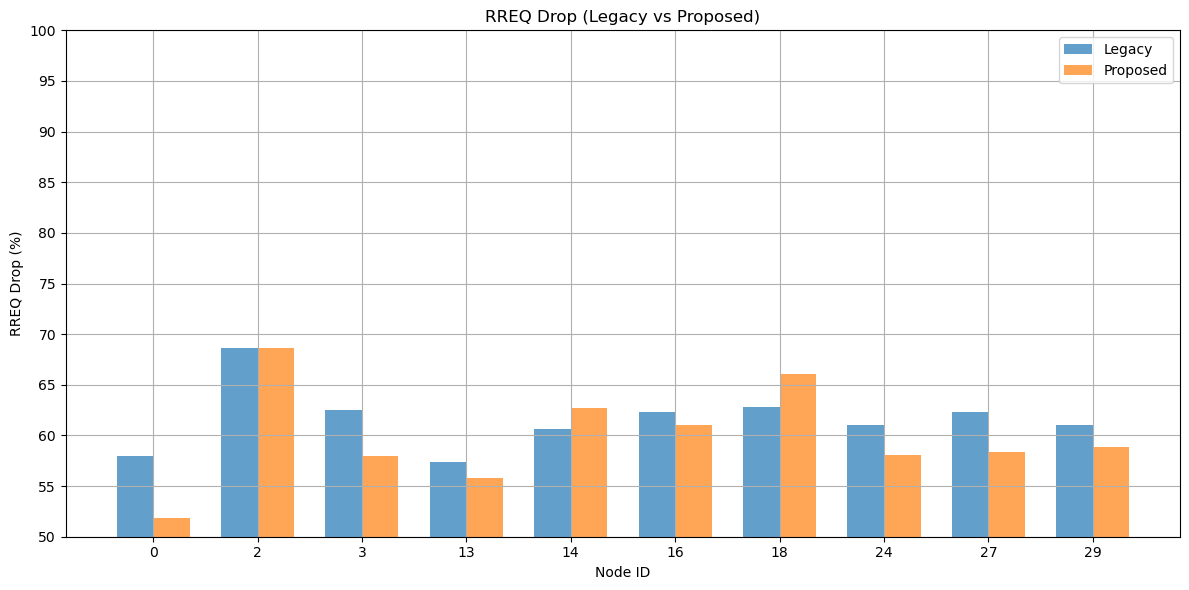

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 2, 3, 13, 14, 16, 18, 24, 27, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/P/D400/S30/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/L/D400/S30/N'

def compute_rreq_drop_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = base_path + str(node) + '/'
        rreq_file = node_path + 'rreqCount.txt'
        drop_file = node_path + 'sinr_drop_log.csv'

        rreq_total = 0
        rreq_drop = 0
        
        print(rreq_file)

        if os.path.isfile(rreq_file):
            with open(rreq_file, 'r') as f:
                rreq_total = len(f.readlines())

        if os.path.isfile(drop_file):
            df = pd.read_csv(drop_file, names=[
                'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z',
                'None', 'Nearby', 'Total'
            ])
            df.columns = df.columns.str.strip()
            rreq_drop = df['Packet'].str.contains('Rreq', case=False).sum()

        drop_ratio = (rreq_drop / rreq_total) * 100 if rreq_total > 0 else 0.0
        result[node] = drop_ratio

    return result

rreq_drop_proposed = compute_rreq_drop_ratio(base_path_proposed, h_node)
rreq_drop_legacy = compute_rreq_drop_ratio(base_path_legacy, h_node)

print("Legacy S10 RREQ Drop:")
for n in h_node:
    print(f"Node {n}: {rreq_drop_legacy[n]:.2f}%")

print("Proposed S10 RREQ Drop:")
for n in h_node:
    print(f"Node {n}: {rreq_drop_proposed[n]:.2f}%")

nodes = h_node
x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in nodes], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in nodes], width=bar_width, label='Proposed', alpha=0.7)
plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%)')
plt.title('RREQ Drop (Legacy vs Proposed)')
plt.ylim(50, 100)
plt.yticks(range(50, 101, 5))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


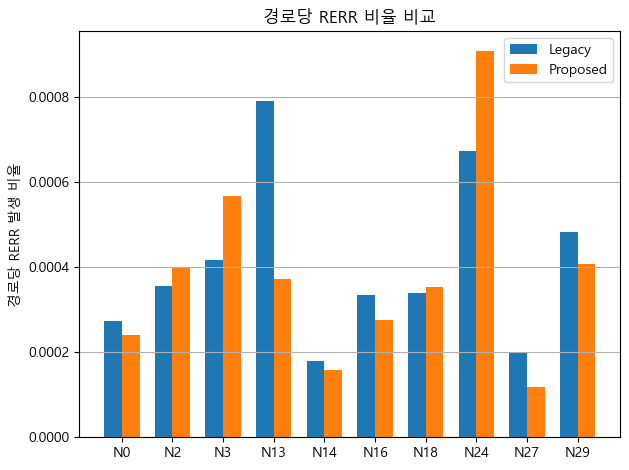

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N27", "N29"]

def safe_len_csv(path):
    if not os.path.isfile(path):
        return 0
    try:
        return len(pd.read_csv(path))
    except:
        return 0

def count_rerr(path):
    fpath = os.path.join(path, "rerr.txt")
    if not os.path.isfile(fpath):
        return 0
    with open(fpath, 'r') as f:
        return sum(1 for line in f if line.strip().startswith("node["))

rerr_ratios_legacy = []
rerr_ratios_proposed = []

for node in nodes:
    l_base = os.path.join(base_path, "L", density, speed, node)
    p_base = os.path.join(base_path, "P", density, speed, node)

    l_routes = safe_len_csv(os.path.join(l_base, "aodv_routing_log.csv"))
    p_routes = safe_len_csv(os.path.join(p_base, "aodv_routing_log.csv"))

    l_rerr = count_rerr(l_base)
    p_rerr = count_rerr(p_base)

    rerr_ratios_legacy.append(l_rerr / l_routes if l_routes else 0)
    rerr_ratios_proposed.append(p_rerr / p_routes if p_routes else 0)

x = np.arange(len(nodes))
width = 0.35

plt.figure()
plt.bar(x - width/2, rerr_ratios_legacy, width=width, label="Legacy")
plt.bar(x + width/2, rerr_ratios_proposed, width=width, label="Proposed")
plt.xticks(x, nodes)
plt.ylabel("경로당 RERR 발생 비율")
plt.title("경로당 RERR 비율 비교")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


N0 - Recovery: 466, RERR: 0, Ratio: 0.0000
N2 - Recovery: 638, RERR: 0, Ratio: 0.0000
N3 - Recovery: 1203, RERR: 0, Ratio: 0.0000
N13 - Recovery: 2117, RERR: 0, Ratio: 0.0000
N14 - Recovery: 450, RERR: 0, Ratio: 0.0000
N16 - Recovery: 999, RERR: 0, Ratio: 0.0000
N18 - Recovery: 1009, RERR: 0, Ratio: 0.0000
N24 - Recovery: 1837, RERR: 0, Ratio: 0.0000
N27 - Recovery: 1363, RERR: 0, Ratio: 0.0000
N29 - Recovery: 1506, RERR: 0, Ratio: 0.0000
N0 - Recovery: 332, RERR: 0, Ratio: 0.0000
N2 - Recovery: 869, RERR: 0, Ratio: 0.0000
N3 - Recovery: 1601, RERR: 0, Ratio: 0.0000
N13 - Recovery: 1347, RERR: 0, Ratio: 0.0000
N14 - Recovery: 178, RERR: 0, Ratio: 0.0000
N16 - Recovery: 690, RERR: 0, Ratio: 0.0000
N18 - Recovery: 1135, RERR: 0, Ratio: 0.0000
N24 - Recovery: 2293, RERR: 0, Ratio: 0.0000
N27 - Recovery: 558, RERR: 0, Ratio: 0.0000
N29 - Recovery: 1079, RERR: 0, Ratio: 0.0000


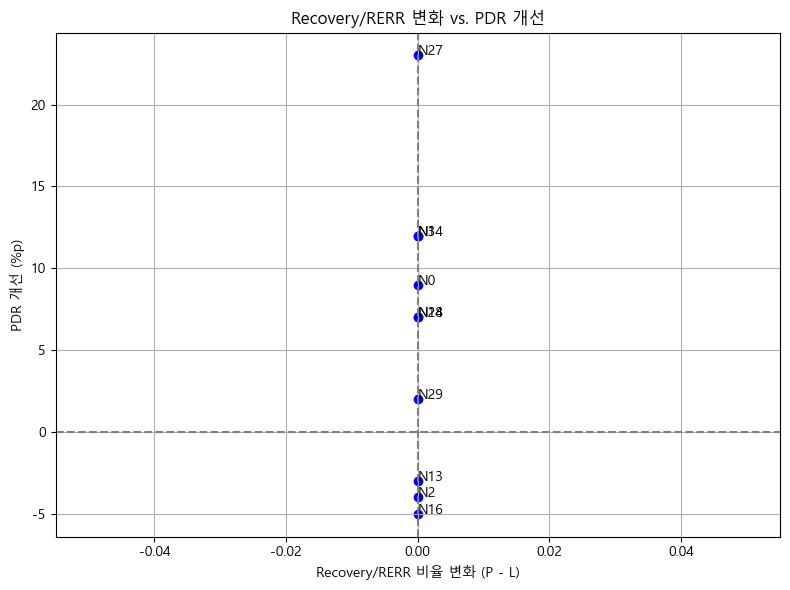

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N27", "N29"]

def calc_recovery_rerr_ratio(path):
    recovery_counts = {}
    rerr_counts = {}
    for node in nodes:
        recovery_path = os.path.join(path, node, "recovery_log.csv")
        rerr_path = os.path.join(path, node, "rerr.txt")  # 수정됨

        recovery_count = 0
        rerr_count = 0

        if os.path.isfile(recovery_path):
            df_recovery = pd.read_csv(recovery_path)
            recovery_count = len(df_recovery)

        if os.path.isfile(rerr_path):
            with open(rerr_path, 'r', encoding='utf-8') as f:
                for line in f:
                    if "RERR 생성" in line or "[RERR]" in line:  # 필요시 패턴 수정
                        rerr_count += 1

        recovery_counts[node] = recovery_count
        rerr_counts[node] = rerr_count

    ratio_dict = {}
    for node in nodes:
        recovery = recovery_counts.get(node, 0)
        rerr = rerr_counts.get(node, 0)
        ratio = recovery / rerr if rerr > 0 else 0
        print(f"{node} - Recovery: {recovery}, RERR: {rerr}, Ratio: {ratio:.4f}")
        ratio_dict[node] = ratio

    return ratio_dict

legacy_path = os.path.join(base_path, "L", density, speed)
proposed_path = os.path.join(base_path, "P", density, speed)

legacy_ratios = calc_recovery_rerr_ratio(legacy_path)
proposed_ratios = calc_recovery_rerr_ratio(proposed_path)

ratio_changes = {node: proposed_ratios[node] - legacy_ratios[node] for node in nodes}

pdr_changes = {
    "N0": 9, "N2": -4, "N3": 12, "N13": -3, "N14": 12,
    "N16": -5, "N18": 7, "N24": 7, "N27": 23, "N29": 2
}

df_plot = pd.DataFrame({
    "Node": nodes,
    "PDR 개선": [pdr_changes[n] for n in nodes],
    "Recovery/RERR 변화": [ratio_changes[n] for n in nodes]
})

plt.figure(figsize=(8, 6))
plt.scatter(df_plot["Recovery/RERR 변화"], df_plot["PDR 개선"], color='blue')
for i in range(len(df_plot)):
    plt.text(df_plot["Recovery/RERR 변화"][i], df_plot["PDR 개선"][i], df_plot["Node"][i])

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Recovery/RERR 비율 변화 (P - L)")
plt.ylabel("PDR 개선 (%p)")
plt.title("Recovery/RERR 변화 vs. PDR 개선")
plt.grid(True)
plt.tight_layout()
plt.show()


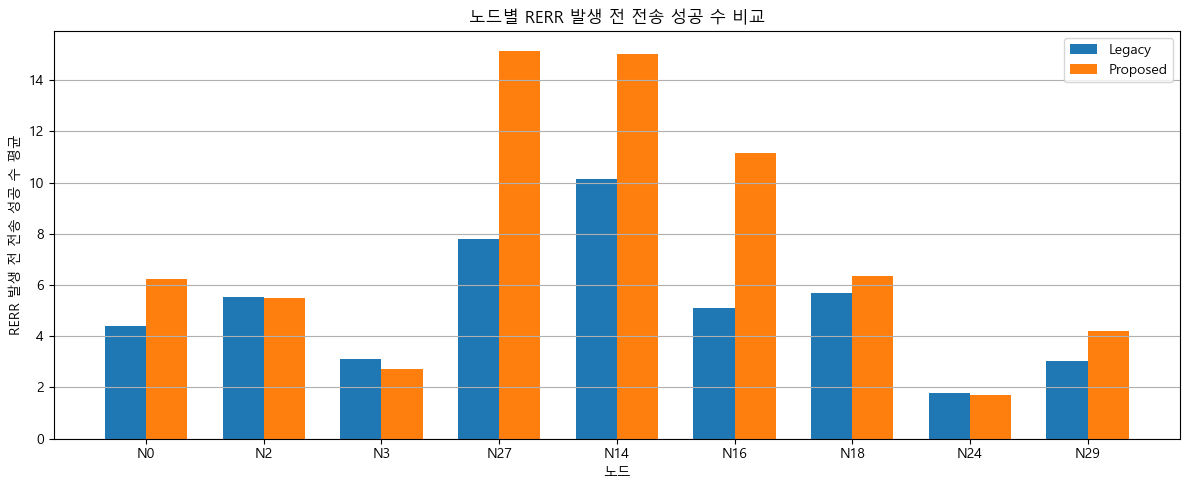

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N27", "N14", "N16", "N18", "N24", "N29"]
time_range = (30.0, 99.0)

def load_success_times(path):
    if not os.path.isfile(path):
        return []
    with open(path, "r") as f:
        times = []
        for line in f:
            if line.strip():
                try:
                    t = float(line.strip().split(":")[0])
                    times.append(t)
                except:
                    continue
        return times

def load_rerr_times(path):
    if not os.path.isfile(path):
        return []
    times = []
    with open(path, "r") as f:
        for line in f:
            try:
                t = float(line.strip().split(":")[1])
                if time_range[0] <= t <= time_range[1]:
                    times.append(t)
            except:
                continue
    return sorted(times)

def count_success_before_each_rerr(success_times, rerr_times):
    count = 0
    rerr_index = 0
    success_index = 0
    rerr_total = len(rerr_times)

    while rerr_index < rerr_total and success_index < len(success_times):
        if success_times[success_index] < rerr_times[rerr_index]:
            count += 1
            success_index += 1
        else:
            rerr_index += 1
    return count, rerr_total

def process_mode(mode):
    result = {}
    for node in nodes:
        success_path = os.path.join(base_path, mode, density, speed, node, "success_app.txt")
        rerr_path = os.path.join(base_path, mode, density, speed, node, "rerr.txt")

        success_times = load_success_times(success_path)
        rerr_times = load_rerr_times(rerr_path)

        count, rerr_total = count_success_before_each_rerr(success_times, rerr_times)
        ratio = count / rerr_total if rerr_total > 0 else 0
        result[node] = ratio
    return result

legacy_result = process_mode("L")
proposed_result = process_mode("P")

x = np.arange(len(nodes))
width = 0.35
legacy_vals = [legacy_result[n] for n in nodes]
proposed_vals = [proposed_result[n] for n in nodes]

plt.figure(figsize=(12, 5))
plt.bar(x - width/2, legacy_vals, width=width, label='Legacy')
plt.bar(x + width/2, proposed_vals, width=width, label='Proposed')
plt.xticks(x, nodes)
plt.xlabel("노드")
plt.ylabel("RERR 발생 전 전송 성공 수 평균")
plt.title("노드별 RERR 발생 전 전송 성공 수 비교")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


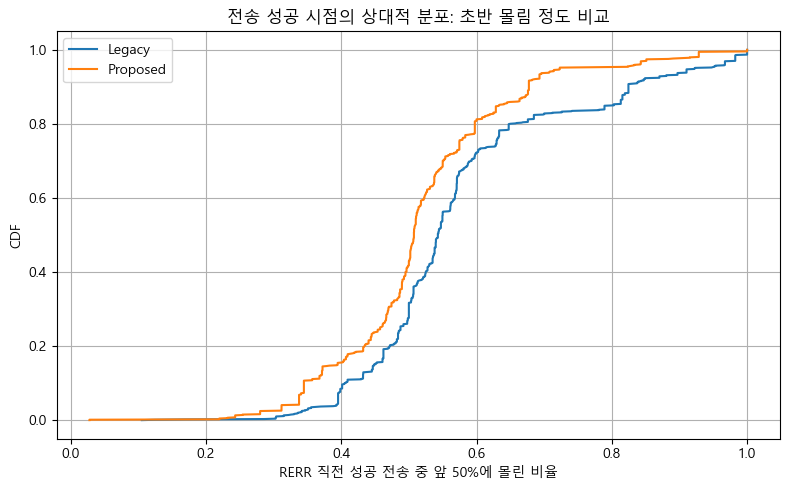

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N27", "N14", "N16", "N18", "N24", "N29"]
time_range = (30.0, 99.0)
head_ratio = 0.5  # 앞쪽 몇 %를 "초반"으로 볼 것인지 (예: 0.2 → 앞 20%)

def load_success_times(path):
    if not os.path.isfile(path):
        return []
    with open(path, "r") as f:
        times = []
        for line in f:
            if line.strip():
                try:
                    t = float(line.strip().split(":")[0])
                    times.append(t)
                except:
                    continue
        return sorted(times)

def load_rerr_times(path):
    if not os.path.isfile(path):
        return []
    times = []
    with open(path, "r") as f:
        for line in f:
            try:
                t = float(line.strip().split(":")[1])
                if time_range[0] <= t <= time_range[1]:
                    times.append(t)
            except:
                continue
    return sorted(times)

def compute_head_ratio(success_times, rerr_times, ratio_threshold):
    ratios = []
    for rerr_time in rerr_times:
        prev_success = [t for t in success_times if t < rerr_time]
        if len(prev_success) < 5:
            continue  # 너무 적으면 skip
        t_start = prev_success[0]
        t_end = rerr_time
        norm_positions = [(t - t_start) / (t_end - t_start) for t in prev_success]
        count_head = sum(1 for p in norm_positions if p <= ratio_threshold)
        ratios.append(count_head / len(prev_success))
    return ratios  # 각 RERR에 대한 초반 몰림 비율 목록

def process_mode(mode):
    all_ratios = []
    for node in nodes:
        success_path = os.path.join(base_path, mode, density, speed, node, "success_app.txt")
        rerr_path = os.path.join(base_path, mode, density, speed, node, "rerr.txt")
        success_times = load_success_times(success_path)
        rerr_times = load_rerr_times(rerr_path)
        ratios = compute_head_ratio(success_times, rerr_times, head_ratio)
        all_ratios.extend(ratios)
    return np.array(all_ratios)

legacy_ratios = process_mode("L")
proposed_ratios = process_mode("P")

# 결과 시각화: CDF
def plot_cdf(data, label):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, yvals, label=label)

plt.figure(figsize=(8, 5))
plot_cdf(legacy_ratios, "Legacy")
plot_cdf(proposed_ratios, "Proposed")
plt.xlabel(f"RERR 직전 성공 전송 중 앞 {int(head_ratio*100)}%에 몰린 비율")
plt.ylabel("CDF")
plt.title(f"전송 성공 시점의 상대적 분포: 초반 몰림 정도 비교")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
import os
import pandas as pd
from collections import defaultdict

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N27", "N14", "N16", "N18", "N24", "N29"]

def load_route_log(protocol, node):
    path = os.path.join(base_path, protocol, density, speed, node, "aodv_routing_log.csv")
    if not os.path.isfile(path):
        return pd.DataFrame()
    df = pd.read_csv(path)
    if not {"Time", "Destination", "New_NextHop", "New_HopCount"}.issubset(df.columns):
        return pd.DataFrame()
    df = df[["Time", "Destination", "New_NextHop", "New_HopCount"]]
    df.sort_values(by="Time", inplace=True)
    return df

records = []
for protocol in ["L", "P"]:
    for node in nodes:
        df = load_route_log(protocol, node)
        if df.empty:
            continue
        last_route = {}
        for _, row in df.iterrows():
            key = (row["Destination"])
            route = (row["New_NextHop"], row["New_HopCount"])
            time = row["Time"]
            if key in last_route:
                prev_route, start_time = last_route[key]
                if route != prev_route:
                    duration = time - start_time
                    records.append({
                        "Node": node,
                        "Protocol": "Legacy" if protocol == "L" else "Proposed",
                        "Destination": key,
                        "StartTime": start_time,
                        "EndTime": time,
                        "Duration": duration
                    })
                    last_route[key] = (route, time)
            else:
                last_route[key] = (route, time)

df_duration = pd.DataFrame(records)
df_duration.to_csv("route_stability_duration.csv", index=False)


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv("route_stability_duration.csv")

# 노드별 평균 경로 지속시간 계산
avg_duration = df.groupby(["Node", "Protocol"])["Duration"].mean().reset_index()

# Legacy/Proposed 비교용 테이블로 변환
pivot_df = avg_duration.pivot(index="Node", columns="Protocol", values="Duration").reset_index()
pivot_df["Improvement"] = pivot_df["Proposed"] - pivot_df["Legacy"]

# 막대그래프 시각화
plt.figure(figsize=(10,6))
x = range(len(pivot_df))
plt.bar(x, pivot_df["Legacy"], width=0.4, label="Legacy", align='edge')
plt.bar(x, pivot_df["Proposed"], width=-0.4, label="Proposed", align='edge')
plt.xticks(x, pivot_df["Node"], rotation=45)
plt.ylabel("평균 경로 지속 시간 (s)")
plt.title("노드별 평균 경로 지속 시간 비교")
plt.legend()
plt.tight_layout()
plt.savefig("avg_route_duration_comparison.png", dpi=300)
plt.close()

# 결과 테이블 저장
pivot_df.to_csv("avg_route_duration_summary.csv", index=False)


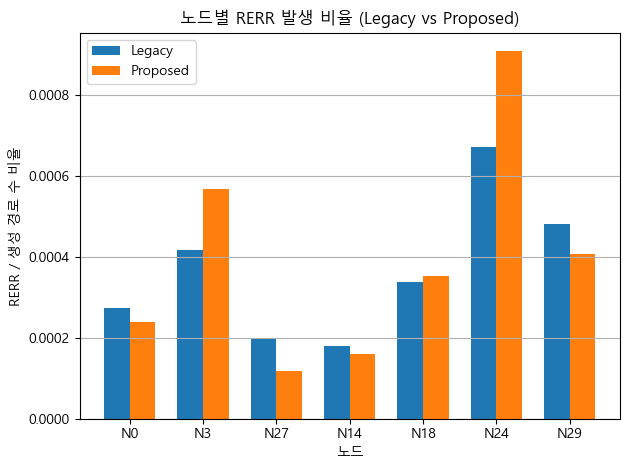

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N3", "N27", "N14", "N18", "N24", "N29"]

def count_rerr(filepath):
    if not os.path.isfile(filepath):
        return 0
    with open(filepath, 'r') as f:
        return sum(1 for line in f if line.strip().startswith("node["))

def count_routes(filepath):
    if not os.path.isfile(filepath):
        return 0
    try:
        df = pd.read_csv(filepath)
        return len(df)
    except:
        return 0

legacy_ratios = []
proposed_ratios = []

for node in nodes:
    legacy_rerr = count_rerr(os.path.join(base_path, "L", density, speed, node, "rerr.txt"))
    proposed_rerr = count_rerr(os.path.join(base_path, "P", density, speed, node, "rerr.txt"))

    legacy_routes = count_routes(os.path.join(base_path, "L", density, speed, node, "aodv_routing_log.csv"))
    proposed_routes = count_routes(os.path.join(base_path, "P", density, speed, node, "aodv_routing_log.csv"))

    legacy_ratio = legacy_rerr / legacy_routes if legacy_routes > 0 else 0
    proposed_ratio = proposed_rerr / proposed_routes if proposed_routes > 0 else 0

    legacy_ratios.append(legacy_ratio)
    proposed_ratios.append(proposed_ratio)

x = np.arange(len(nodes))
width = 0.35

plt.figure()
plt.bar(x - width/2, legacy_ratios, width=width, label='Legacy')
plt.bar(x + width/2, proposed_ratios, width=width, label='Proposed')
plt.xticks(x, nodes)
plt.xlabel("노드")
plt.ylabel("RERR / 생성 경로 수 비율")
plt.title("노드별 RERR 발생 비율 (Legacy vs Proposed)")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
